In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [84]:
# Define a simple MLP model for regression with 5 hidden layers
class MLPRegression(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLPRegression, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.fc5 = nn.Linear(hidden_size, 1)  # Output layer with one node for regression

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        out = self.relu(out)
        out = self.fc5(out)
        return out

In [85]:
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size = 64):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [86]:
class FiLM(nn.Module):
    def __init__(self, input_size=3, hidden_size = 64):    # input_size = 3 corresponding to (x, y, encoder_output)
        super(FiLM, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 2)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [100]:
# Define a simple MLP model for regression with 5 hidden layers
class MLPRegression_adaptive(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLPRegression_adaptive, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.fc5 = nn.Linear(hidden_size, 1)  # Output layer with one node for regression
        
    def forward(self, x, y):
        encoder1 = Encoder(1)
        encoder1_output = encoder1(x)
        print('encoder1_output.shape: ', encoder1_output.shape)
        film1 = FiLM()
        film1_input = torch.cat((X, y, encoder1_output), 1)
        film1_output = film1(film1_input)
        print('film1_output.shape: ', film1_output.shape)
        out = self.fc1(x)
        out = out * film1_output[:, 0].mean() + film1_output[:, 1].mean()
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        out = self.relu(out)
        out = self.fc5(out)
        return out

In [101]:
def get_sine(A, B, w, phi, x):
    torch.manual_seed(0)
    return A * torch.sin(w * x + phi) + B + torch.randn(x.shape) * 0.1

In [110]:
# Hyperparameters
input_size = 1  # One input feature
hidden_size = 128  # Number of neurons in each hidden layer
learning_rate = 0.01
num_epochs = 5000

# Generate synthetic data for regression
torch.manual_seed(0)
A = 2.0
B = 1.0
w = 2.0
phi = 0.1
upper_bound = 2 * torch.pi / w
X = torch.linspace(0, upper_bound, 100).reshape(100, input_size)
y = get_sine(A, B, w, phi, X)  # Sine function with noise


# Initialize the MLP regression model
# model = MLPRegression(input_size, hidden_size)
model = MLPRegression_adaptive(input_size, hidden_size)

# Loss and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    # outputs = model(X)
    outputs = model(X, y)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Make predictions
with torch.no_grad():
    # predicted = model(X)
    predicted = model(X, y)

# print("Predicted values:")
# print(predicted)

# Save the trained model
torch.save(model.state_dict(), 'checkpoints/mlp_regression_model_5hiddenlayers.ckpt')
print('MLP regression model with 5 hidden layers trained and saved!')

encoder1_output.shape:  torch.Size([100, 1])
film1_output.shape:  torch.Size([100, 2])
encoder1_output.shape:  torch.Size([100, 1])
film1_output.shape:  torch.Size([100, 2])
encoder1_output.shape:  torch.Size([100, 1])
film1_output.shape:  torch.Size([100, 2])
encoder1_output.shape:  torch.Size([100, 1])
film1_output.shape:  torch.Size([100, 2])
encoder1_output.shape:  torch.Size([100, 1])
film1_output.shape:  torch.Size([100, 2])
encoder1_output.shape:  torch.Size([100, 1])
film1_output.shape:  torch.Size([100, 2])
encoder1_output.shape:  torch.Size([100, 1])
film1_output.shape:  torch.Size([100, 2])
encoder1_output.shape:  torch.Size([100, 1])
film1_output.shape:  torch.Size([100, 2])
encoder1_output.shape:  torch.Size([100, 1])
film1_output.shape:  torch.Size([100, 2])
encoder1_output.shape:  torch.Size([100, 1])
film1_output.shape:  torch.Size([100, 2])
encoder1_output.shape:  torch.Size([100, 1])
film1_output.shape:  torch.Size([100, 2])
encoder1_output.shape:  torch.Size([100, 1]

In [111]:
X.shape

torch.Size([100, 1])

In [112]:
y.shape

torch.Size([100, 1])

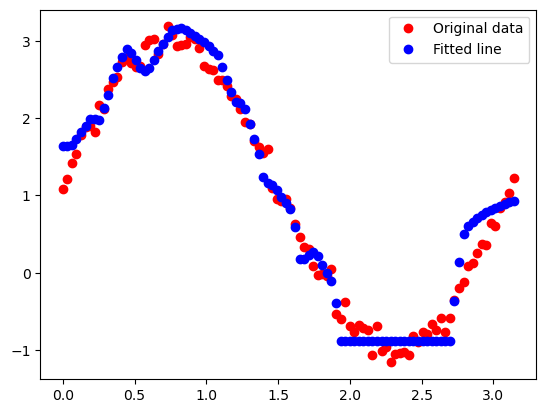

In [113]:
# plot x and y
plt.plot(X, y, 'ro', label='Original data')
plt.plot(X, predicted, 'bo', label='Fitted line')
plt.legend()
plt.show()

In [ ]:
# class CNAPSRegression(nn.Module):
#     def __init__(self, input_size, hidden_size, num_tasks):
#         super(CNAPSRegression, self).__init__()
#         self.num_tasks = num_tasks
#         self.task_embeddings = nn.Embedding(num_tasks, hidden_size)
#         self.mlp = MLPRegression(input_size + hidden_size, hidden_size)

#     def forward(self, x, task):
#         task_embedding = self.task_embeddings(task)
#         out = torch.cat((x, task_embedding), dim=1)
#         out = self.mlp(out)
#         return out